# Plotting Average LST over time and Differences-in-Differences Regression

## Bukit Purmei 2022

### Filtering criteria for clouds

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the CSV files
file_path1 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\Landsat8\BukitPurmei_Filtered_2019_to_2021_Blocks.csv"
file_path2 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\Landsat7\BukitPurmei_Filtered_2019_to_2021_Blocks.csv"
file_path3 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\Landsat9\BukitPurmei_Filtered_2021_Blocks.csv"

# Read the CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)

# Concatenate the two dataframes
bukit_purmei_2022_df = pd.concat([df1, df2, df3], ignore_index=True)

bukit_purmei_2022_df['QA_PIXEL'] = bukit_purmei_2022_df['QA_PIXEL'].fillna(-1).astype(int)
all_unique_values = set(bukit_purmei_2022_df['QA_PIXEL'].unique())

def convert_to_binary_16(value):
    # Convert value to binary, padded to 16 bits
    if value == -1:
        return 'NaN'  # Return a string 'NaN' for placeholder
    binary_string = format(value, '016b')
    # Split the binary string into 4 groups of 4 digits each
    return ' '.join([binary_string[i:i+4] for i in range(0, 16, 4)])

# Convert and print all unique values
for value in all_unique_values:
    binary_representation = convert_to_binary_16(value)
    print(f'Original: {value}, Binary: {binary_representation}')

# # Filter out unwanted QA_PIXEL values
# qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826, 5896, 7698, 7442, 7440]
# treatment_data = treatment_data[~treatment_data['QA_PIXEL'].isin(qa_pixel_filter)]
# control_data = control_data[~control_data['QA_PIXEL'].isin(qa_pixel_filter)]

# 5896: High confidence cloud
# 7698, 7442, 7440: High confidence cloud shadow

Original: 21824, Binary: 0101 0101 0100 0000
Original: 22080, Binary: 0101 0110 0100 0000
Original: 22018, Binary: 0101 0110 0000 0010
Original: 21762, Binary: 0101 0101 0000 0010
Original: 5440, Binary: 0001 0101 0100 0000
Original: 5696, Binary: 0001 0110 0100 0000
Original: 5442, Binary: 0001 0101 0100 0010
Original: 5698, Binary: 0001 0110 0100 0010
Original: 22280, Binary: 0101 0111 0000 1000
Original: 5896, Binary: 0001 0111 0000 1000
Original: 5504, Binary: 0001 0101 1000 0000
Original: 23888, Binary: 0101 1101 0101 0000
Original: 24144, Binary: 0101 1110 0101 0000
Original: 24082, Binary: 0101 1110 0001 0010
Original: 23826, Binary: 0101 1101 0001 0010
Original: 7698, Binary: 0001 1110 0001 0010
Original: 7442, Binary: 0001 1101 0001 0010
Original: 7440, Binary: 0001 1101 0001 0000


In [29]:
print(bukit_purmei_2022_df)

0       22280
1       22280
2       22280
3       22280
4       22280
        ...  
1673     5440
1674     5440
1675     5440
1676     5440
1677     5440
Name: QA_PIXEL, Length: 1678, dtype: int32


### Plot for Average LST against Time

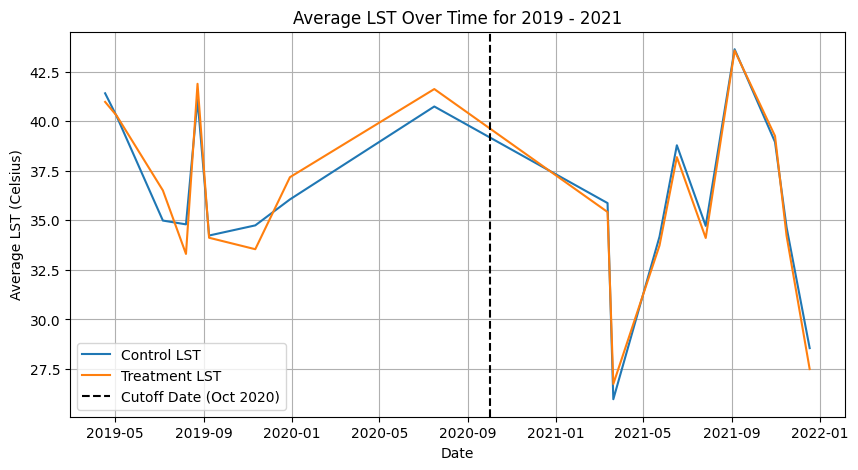

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the CSV files
file_path1 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\Landsat8\BukitPurmei_Filtered_2019_to_2021_Blocks.csv"
file_path2 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\Landsat7\BukitPurmei_Filtered_2019_to_2021_Blocks.csv"
file_path3 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\Landsat9\BukitPurmei_Filtered_2021_Blocks.csv"

# Read the CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)

# Rename temperature columns to a unified column name
df1.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
df2.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)
df3.rename(columns={'ST_B10_Celsius' : 'LST_Celsius'}, inplace=True)

# Concatenate the two dataframes
bukit_purmei_2022_df = pd.concat([df1, df2, df3], ignore_index=True)

# # Filter for 'QA_PIXEL' = 21824
# bukit_purmei_2022_df = bukit_purmei_2022_df[bukit_purmei_2022_df['QA_PIXEL'] == 21824]

# Convert 'time' to datetime and filter for the year 2022
bukit_purmei_2022_df['time'] = pd.to_datetime(bukit_purmei_2022_df['time'])
# bukit_purmei_2022_df = bukit_purmei_2022_df[bukit_purmei_2022_df['time'].dt.date >= pd.to_datetime('2019-01-01').date()]

# Filter out unwanted QA_PIXEL values
qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826, 5896, 7698, 7442, 7440]
bukit_purmei_2022_df = bukit_purmei_2022_df[~bukit_purmei_2022_df['QA_PIXEL'].isin(qa_pixel_filter)]

# Additional filtering for 'SR_QA_AEROSOL'
sr_qa_aerosol_filter = [192, 194, 196, 224, 228]
bukit_purmei_2022_df = bukit_purmei_2022_df[~bukit_purmei_2022_df['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

# Map blocks to grouped blocks
block_group_map = {
    'polygon_112': 'Treatment',
    'polygon_114': 'Treatment',
    'polygon_113': 'Control',
    'polygon_115': 'Control'
}
bukit_purmei_2022_df['group'] = bukit_purmei_2022_df['block'].map(block_group_map)

# Group by 'group' and 'time', and calculate the average ST_B10_Celsius
grouped_data = bukit_purmei_2022_df.groupby(['group', bukit_purmei_2022_df['time'].dt.date])['LST_Celsius'].mean().unstack(0)
grouped_data = grouped_data.dropna(how='any', axis=0)

# Plotting
plt.figure(figsize=(10, 5))
cutoff_date = pd.to_datetime('2020-10-01')
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=f'{column} LST')
    # plt.scatter(grouped_data.index, grouped_data[column], color='red')  # Dots on each data point

# Add the cutoff date line once outside the loop
plt.axvline(x=cutoff_date, color='black', linestyle='--', label='Cutoff Date (Oct 2020)')  # Vertical line at the cutoff date
plt.title('Average LST Over Time for 2019 - 2021')
plt.xlabel('Date')
plt.ylabel('Average LST (Celsius)')
plt.grid(True)
plt.legend()
plt.show()

### Differences-in-Differences Regression

##### Coefficient of `treatment:treatment_date` is 1.2551 and is not statistically significant

In [10]:
# For treatment, create a variable `treatment` where its values are `1` for polygon_112 and polygon_114 
# and `0` for polygon_113 and polygon_115

# For time, create a variable `time` where its values are `1` for time period >= October 2020
# and `0` for dates < October 2020

# Interaction term is both multiplied with each other, estimate the effects

# print(bukit_purmei_2022_df.columns)

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Convert 'time' column to datetime if it's not already
bukit_purmei_2022_df['time'] = pd.to_datetime(bukit_purmei_2022_df['time'])

# Create 'treatment' column where 'Treatment' group members receive 1, others 0
bukit_purmei_2022_df['treatment'] = (bukit_purmei_2022_df['group'] == 'Treatment').astype(int)

# Create 'time' column for post-treatment period (October 2020 onwards), assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2020-10-01')
bukit_purmei_2022_df['treatment_date'] = (bukit_purmei_2022_df['time'].dt.date >= cutoff_date.date()).astype(int)

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment:treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=bukit_purmei_2022_df).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     29.54
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.51e-17
Time:                        10:46:23   Log-Likelihood:                -1416.2
No. Observations:                 485   AIC:                             2840.
Df Residuals:                     481   BIC:                             2857.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

##### Using LinearModels and (Clustered Standard Errors)

In [11]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Assuming 'bukit_purmei_2022_df' is already loaded
# Convert 'time' column to datetime if it's not already
bukit_purmei_2022_df['time'] = pd.to_datetime(bukit_purmei_2022_df['time'])

# Create 'treatment' column where 'Treatment' group members receive 1, others 0
bukit_purmei_2022_df['treatment'] = (bukit_purmei_2022_df['group'] == 'Treatment').astype(int)

# Create 'time' column for post-treatment period (October 2020 onwards), assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2020-10-01')
bukit_purmei_2022_df['treatment_date'] = (bukit_purmei_2022_df['time'].dt.date >= cutoff_date.date()).astype(int)

# Ensure your DataFrame has an appropriate index for panel data analysis
# Assuming 'entity_id' is the identifier for different observational units
bukit_purmei_2022_df = bukit_purmei_2022_df.set_index(['block', 'time'], drop=False)

# Define the formula for the regression model including the interaction term directly
# You need to ensure the formula is compatible with linearmodels and that the DataFrame index is properly set
formula = 'LST_Celsius ~ 1 + treatment + treatment_date + treatment:treatment_date'

# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=bukit_purmei_2022_df)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)
# results = model.fit(cov_type='robust')

print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.1556
Estimator:                   PanelOLS   R-squared (Between):              0.5372
No. Observations:                 485   R-squared (Within):               0.1430
Date:                Tue, Jun 18 2024   R-squared (Overall):              0.1556
Time:                        10:46:25   Log-likelihood                   -1416.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      29.544
Entities:                           4   P-value                           0.0000
Avg Obs:                       121.25   Distribution:                   F(3,481)
Min Obs:                       70.000                                           
Max Obs:                       151.00   F-statistic (robust):         -6.435e+15
                            

In [4]:
print(bukit_purmei_2022_df)

                         Longitude  Latitude    SR_B1    SR_B2    SR_B3  \
block       time                                                          
polygon_113 2019-03-08  103.827383  1.274858  16638.0  17357.0  18885.0   
polygon_114 2019-05-27  103.825496  1.275128  10704.0  11080.0  12422.0   
            2019-05-27  103.825765  1.275128  10786.0  11093.0  12645.0   
            2019-05-27  103.825496  1.274857  10540.0  10968.0  12373.0   
polygon_112 2019-05-27  103.825765  1.274585  11338.0  11871.0  13556.0   
...                            ...       ...      ...      ...      ...   
polygon_113 2021-12-18  103.827383  1.274586  16409.0  17189.0  17072.0   
polygon_112 2021-12-18  103.825496  1.274314  13472.0  14155.0  14128.0   
            2021-12-18  103.825765  1.274314  12723.0  13584.0  13831.0   
            2021-12-18  103.826035  1.274314  12077.0  12666.0  12835.0   
            2021-12-18  103.826305  1.274314  11860.0  12435.0  12334.0   

                        

In [334]:
print(bukit_purmei_2022_df.group)

86        Control
198     Treatment
199     Treatment
205     Treatment
214     Treatment
          ...    
1673      Control
1674    Treatment
1675    Treatment
1676    Treatment
1677    Treatment
Name: group, Length: 485, dtype: object


In [322]:
print(bukit_purmei_2022_df['LST_Celsius'])

86      30.737580
198     41.165955
199     41.217224
205     41.203552
214     41.463350
          ...    
1673    26.488983
1674    26.420624
1675    27.343475
1676    29.018310
1677    29.018310
Name: LST_Celsius, Length: 485, dtype: float64


#### Parallel Trends Assumption

In [29]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = bukit_purmei_2022_df

# Define the cutoff date
cutoff_date = pd.Timestamp('2020-10-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre['time'].dt.date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['group'].map({'Treatment': 1, 'Control': 0})

# Fit the regression model
model = smf.ols('LST_Celsius ~ time_periods + int_time_group + C(group)', data=df_pre).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     28.51
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           6.97e-16
Time:                        15:32:59   Log-Likelihood:                -636.82
No. Observations:                 253   AIC:                             1282.
Df Residuals:                     249   BIC:                             1296.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                41.44

#### Placebo Test

##### Chosen fake treatment dates are 2019-10, 2020-01, 2020-04, 2020-07. All show that there is insufficient evidence to prove that the estimate is not equal to 0

In [103]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
bukit_purmei_2022_df['time'] = pd.to_datetime(bukit_purmei_2022_df['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2020-10-01')
df_pre_treatment = bukit_purmei_2022_df[bukit_purmei_2022_df['time'] < pre_treatment_cutoff].copy()

# Create a 'treatment' column where 'Treatment' group members receive 1, others 0
df_pre_treatment['treatment'] = (df_pre_treatment['group'].isin(['Treatment'])).astype(int)

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2019-10-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     7.177
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           0.000122
Time:                        12:52:26   Log-Likelihood:                -663.68
No. Observations:                 253   AIC:                             1335.
Df Residuals:                     249   BIC:                             1349.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [104]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
bukit_purmei_2022_df['time'] = pd.to_datetime(bukit_purmei_2022_df['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2020-10-01')
df_pre_treatment = bukit_purmei_2022_df[bukit_purmei_2022_df['time'] < pre_treatment_cutoff].copy()

# Create a 'treatment' column where 'Treatment' group members receive 1, others 0
df_pre_treatment['treatment'] = (df_pre_treatment['group'].isin(['Treatment'])).astype(int)

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2020-01-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3.896
Date:                Wed, 12 Jun 2024   Prob (F-statistic):            0.00954
Time:                        12:52:35   Log-Likelihood:                -668.37
No. Observations:                 253   AIC:                             1345.
Df Residuals:                     249   BIC:                             1359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [163]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
bukit_purmei_2022_df['time'] = pd.to_datetime(bukit_purmei_2022_df['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2020-10-01')
df_pre_treatment = bukit_purmei_2022_df[bukit_purmei_2022_df['time'] < pre_treatment_cutoff].copy()

# Create a 'treatment' column where 'Treatment' group members receive 1, others 0
df_pre_treatment['treatment'] = (df_pre_treatment['group'].isin(['Treatment'])).astype(int)

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2020-04-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3.896
Date:                Wed, 12 Jun 2024   Prob (F-statistic):            0.00954
Time:                        16:12:28   Log-Likelihood:                -668.37
No. Observations:                 253   AIC:                             1345.
Df Residuals:                     249   BIC:                             1359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [165]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
bukit_purmei_2022_df['time'] = pd.to_datetime(bukit_purmei_2022_df['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2020-10-01')
df_pre_treatment = bukit_purmei_2022_df[bukit_purmei_2022_df['time'] < pre_treatment_cutoff].copy()

# Create a 'treatment' column where 'Treatment' group members receive 1, others 0
df_pre_treatment['treatment'] = (df_pre_treatment['group'].isin(['Treatment'])).astype(int)

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2020-08-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.631
Date:                Wed, 12 Jun 2024   Prob (F-statistic):             0.0740
Time:                        16:13:46   Log-Likelihood:                -671.54
No. Observations:                 253   AIC:                             1349.
Df Residuals:                     250   BIC:                             1360.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

c:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


## Tampines 2022 - 2024

### Filtering Criteria for Clouds

In [64]:
import numpy as np
import pandas as pd

treatment_file_path = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Tampines_Treatment_Filtered_2021_to_2024.csv"
control_file_path = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Tampines_Control_Filtered_2021_to_2024.csv"

# Re-load the data from the CSV files
treatment_data = pd.read_csv(treatment_file_path)
control_data = pd.read_csv(control_file_path)

# Assuming treatment_data and control_data are already loaded and contain the 'QA_PIXEL' column
treatment_data['QA_PIXEL'] = treatment_data['QA_PIXEL'].fillna(-1).astype(int)
control_data['QA_PIXEL'] = control_data['QA_PIXEL'].fillna(-1).astype(int)

# Combine unique values from both datasets
unique_values_treatment = set(treatment_data['QA_PIXEL'].unique())
unique_values_control = set(control_data['QA_PIXEL'].unique())
all_unique_values = unique_values_treatment.union(unique_values_control)  # Use set union to avoid duplicates

def convert_to_binary_16(value):
    # Convert value to binary, padded to 16 bits
    if value == -1:
        return 'NaN'  # Return a string 'NaN' for placeholder
    binary_string = format(value, '016b')
    # Split the binary string into 4 groups of 4 digits each
    return ' '.join([binary_string[i:i+4] for i in range(0, 16, 4)])

# Convert and print all unique values
for value in all_unique_values:
    binary_representation = convert_to_binary_16(value)
    print(f'Original: {value}, Binary: {binary_representation}')

# # Filter out unwanted QA_PIXEL values
# qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826]
# treatment_data = treatment_data[~treatment_data['QA_PIXEL'].isin(qa_pixel_filter)]
# control_data = control_data[~control_data['QA_PIXEL'].isin(qa_pixel_filter)]

# 22080: Low confidence cirrus cloud, low confidence snow/ice, low confidence cloud shadow, medium confidence cloud
# 21824: Low confidence cirrus/snow/ice/cloud shadow/cloud
# 21762: Low confidence cirrus/snow/ice/cloud shadow/cloud
# 22018: Low confidence cirrus/snow/ice/cloud shadow, medium confidence cloud
# 54596: High confidence cirrus/low confidence snow/ice/cloud shadow/cloud
# 21952: Low confidence cirrus/snow/ice/cloud shadow, high confidence cloud, water, dilated cloud
# 22280: Low confidence cirrus/snow/ice/cloud shadow/cloud, high confidence cloud 
# 55052: High confidence cirrus, low confidence snow/ice/cloud shadow, high confidence cloud
# 23888: Low confidence cirrus/snow/ice/cloud, high confidence cloud shadow
# 24144: Low confidence cirrus/snow/ice, high confdience cloud shadow, medium confidence cloud
# 23826: Low confidence cirrus/snow/ice/cloud, high confidence cloud shadow
# 56660: High confidence cirrus/cloud shadow, low confidence snow/ice

Original: 22080, Binary: 0101 0110 0100 0000
Original: 21824, Binary: 0101 0101 0100 0000
Original: 21762, Binary: 0101 0101 0000 0010
Original: 22018, Binary: 0101 0110 0000 0010
Original: 54596, Binary: 1101 0101 0100 0100
Original: 21952, Binary: 0101 0101 1100 0000
Original: 22280, Binary: 0101 0111 0000 1000
Original: 55052, Binary: 1101 0111 0000 1100
Original: 23888, Binary: 0101 1101 0101 0000
Original: 24144, Binary: 0101 1110 0101 0000
Original: 23826, Binary: 0101 1101 0001 0010
Original: 24082, Binary: 0101 1110 0001 0010
Original: 56660, Binary: 1101 1101 0101 0100


In [33]:
print("Original Length of Treatment:", len(treatment_data))
print("Original Length of Control Data:", len(control_data))

Original Length of Treatment: 18126
Original Length of Control Data: 5007


In [58]:
# Assuming treatment_data and control_data are already loaded and contain the 'QA_PIXEL' column
treatment_data['SR_QA_AEROSOL'] = treatment_data['SR_QA_AEROSOL'].fillna(-1).astype(int)
control_data['SR_QA_AEROSOL'] = control_data['SR_QA_AEROSOL'].fillna(-1).astype(int)

# Combine unique values from both datasets
unique_values_treatment = set(treatment_data['SR_QA_AEROSOL'].unique())
unique_values_control = set(control_data['SR_QA_AEROSOL'].unique())
all_unique_values = unique_values_treatment.union(unique_values_control)  # Use set union to avoid duplicates

def convert_to_binary_8(value):
    # Convert value to binary, padded to 16 bits
    if value == -1:
        return 'NaN'  # Return a string 'NaN' for placeholder
    binary_string = format(value, '08b')
    # Split the binary string into 4 groups of 4 digits each
    return ' '.join([binary_string[i:i+4] for i in range(0, 8, 4)])

# Convert and print all unique values
for value in all_unique_values:
    binary_representation = convert_to_binary_8(value)
    print(f'Original: {value}, Binary: {binary_representation}')

Original: 224, Binary: 1110 0000
Original: 96, Binary: 0110 0000
Original: 194, Binary: 1100 0010
Original: 160, Binary: 1010 0000
Original: 192, Binary: 1100 0000
Original: 64, Binary: 0100 0000
Original: 130, Binary: 1000 0010
Original: 128, Binary: 1000 0000
Original: 66, Binary: 0100 0010
Original: 228, Binary: 1110 0100
Original: 198, Binary: 1100 0110


### Plot for Average LST against Time

#### Tampines Treatment & Control 2021 - 2024

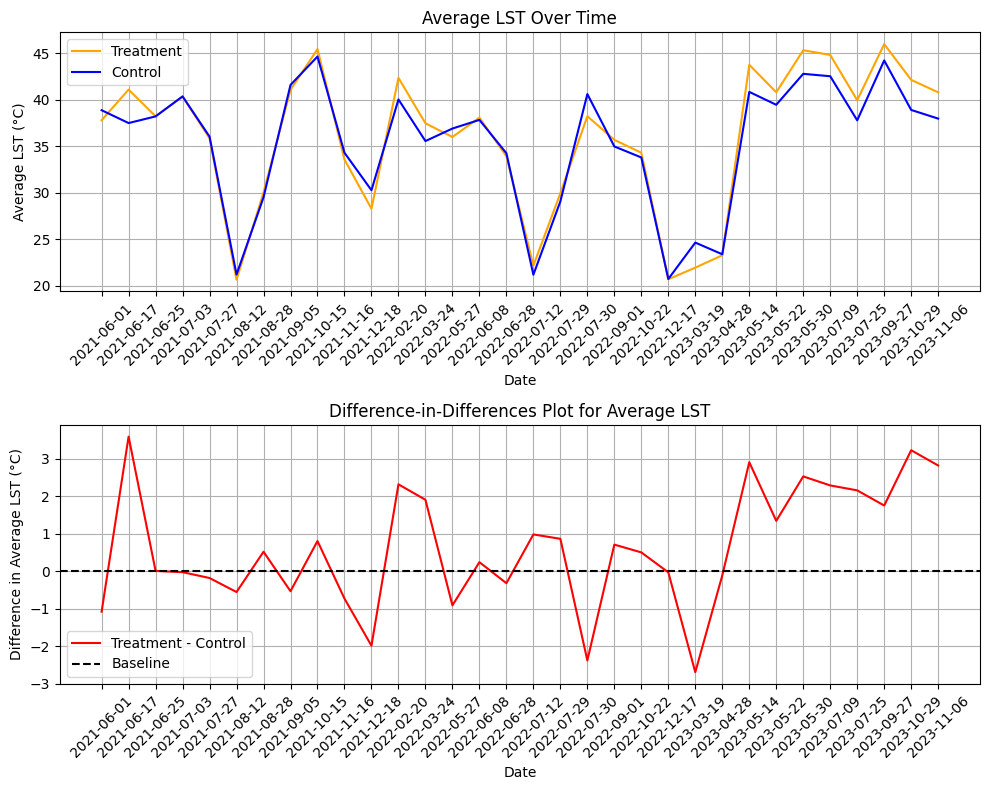

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File paths for Landsat 8 and 9 data
file_paths = {
    'Landsat8': {
        'treatment': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat8\Tampines_Treatment_Filtered_2021_to_2024.csv",
        'control': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat8\Tampines_Control_Filtered_2021_to_2024.csv"
    },
    'Landsat9': {
        'treatment': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat9\Tampines_Treatment_Filtered_2021_to_2024.csv",
        'control': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat9\Tampines_Control_Filtered_2021_to_2024.csv"
    },
    'Landsat7': {
        'treatment': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat7\Tampines_Treatment_Filtered_2021_to_2022.csv",
        'control': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat7\Tampines_Control_Filtered_2021_to_2022.csv"
    }
}

treatment_frames = []
control_frames = []

# Load data, add 'SATELLITE' and 'CTRL_TREATMENT' columns, and normalize the temperature column name
for satellite, paths in file_paths.items():
    for group, path in paths.items():
        temp_df = pd.read_csv(path)
        temp_df['SATELLITE'] = satellite
        temp_df['CTRL_TREATMENT'] = group
        # Check the satellite and rename the corresponding temperature column to 'LST_Celsius'
        if 'Landsat7' in satellite:
            temp_df.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)
        else:
            temp_df.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
        if group == 'treatment':
            treatment_frames.append(temp_df)
        else:
            control_frames.append(temp_df)

# Concatenate all treatment and control data into single DataFrames
treatment_data = pd.concat(treatment_frames, ignore_index=True)
control_data = pd.concat(control_frames, ignore_index=True)

# # Save the concatenated data to CSV files
# treatment_data.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Combined_Treatment_Data.csv", index=False)
# control_data.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Combined_Control_Data.csv", index=False)

# print("Data saved successfully.")

# Convert the 'time' column to datetime format
treatment_data['time'] = pd.to_datetime(treatment_data['time'])
control_data['time'] = pd.to_datetime(control_data['time'])

# Filter out unwanted QA_PIXEL values
qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826, 5896, 7698, 7442, 7440]
treatment_data = treatment_data[~treatment_data['QA_PIXEL'].isin(qa_pixel_filter)]
control_data = control_data[~control_data['QA_PIXEL'].isin(qa_pixel_filter)]

# Additional filtering for 'SR_QA_AEROSOL'
sr_qa_aerosol_filter = [192, 194, 196, 224, 228]  # Filtering out high aerosol levels
treatment_data = treatment_data[~treatment_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]
control_data = control_data[~control_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

# Filter data from June 2021 onwards (1 year before painting)
treatment_data = treatment_data[treatment_data['time'].dt.date >= pd.to_datetime('2021-06-01').date()]
control_data = control_data[control_data['time'].dt.date >= pd.to_datetime('2021-06-01').date()]

# Group by 'time' and calculate the average
average_treatment_lst = treatment_data.groupby(treatment_data['time'].dt.date)['LST_Celsius'].mean()
average_control_lst = control_data.groupby(control_data['time'].dt.date)['LST_Celsius'].mean()

# Use an outer join to include all dates from both groups
combined_dates = pd.concat([average_treatment_lst.rename('Treatment'), average_control_lst.rename('Control')], axis=1, join='inner')
dates = combined_dates.index  # This includes all dates from both datasets

# Create a figure with two subplots
fig, (ax2, ax1) = plt.subplots(nrows=2, figsize=(10, 8))

# Use integer indices for plotting to manage irregular time data
date_indices = range(len(dates))

# Plotting with handling for NaN values
ax2.plot(date_indices, combined_dates['Treatment'].values, color='orange', label='Treatment')
ax2.plot(date_indices, combined_dates['Control'].values, color='blue', label='Control')
ax2.set_title('Average LST Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average LST (°C)')
ax2.grid(True)
ax2.legend()
ax2.set_xticks(date_indices)
ax2.set_xticklabels([date.strftime('%Y-%m-%d') for date in dates], rotation=45)

# Difference-in-Differences Plot, accounting for NaNs
did_lst = combined_dates['Treatment'] - combined_dates['Control']
ax1.plot(date_indices, did_lst.values, color='r', label='Treatment - Control')
ax1.axhline(y=0, color='k', linestyle='--', label='Baseline')
ax1.set_title('Difference-in-Differences Plot for Average LST')
ax1.set_xlabel('Date')
ax1.set_ylabel('Difference in Average LST (°C)')
ax1.grid(True)
ax1.legend()
ax1.set_xticks(date_indices)
ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in dates], rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

#### Tampines Treatment & Control 2019 - 2024

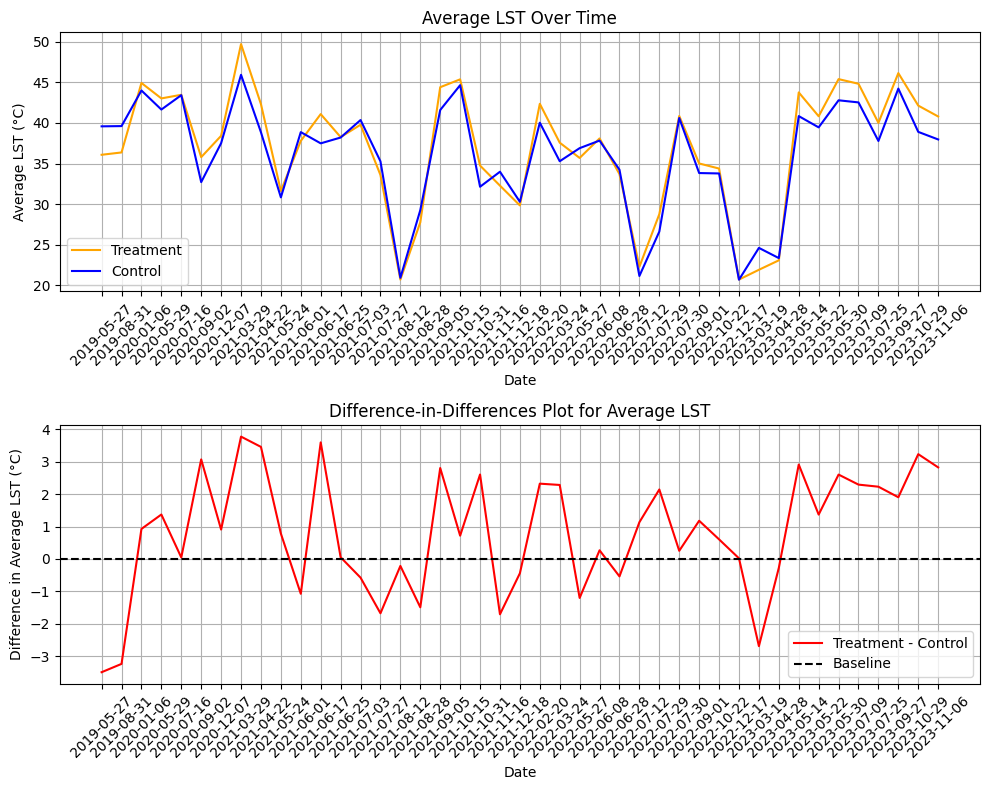

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File paths for Landsat 8 and 9 data
file_paths = {
    'Landsat8': {
        'treatment': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat8\Tampines_Treatment_Filtered_2019_to_2024.csv",
        'control': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat8\Tampines_Control_Filtered_2019_to_2024.csv"
    },
    'Landsat9': {
        'treatment': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat9\Tampines_Treatment_Filtered_2021_to_2024.csv",
        'control': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat9\Tampines_Control_Filtered_2021_to_2024.csv"
    },
    'Landsat7': {
        'treatment': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat7\Tampines_Treatment_Filtered_2021_to_2022.csv",
        'control': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat7\Tampines_Control_Filtered_2021_to_2022.csv"
    }
}

tampines_treatment_frames = []
tampines_control_frames = []

batch_4 = ['polygon_860B', 'polygon_860', 'polygon_860A', 'polygon_859A', 'polygon_859', 'polygon_859B', 'polygon_858B', 'polygon_858', 'polygon_858A', 'polygon_861A', 'polygon_861',
           'polygon_855', 'polygon_853', 'polygon_849', 'polygon_851', 'polygon_847', 'polygon_845', 'polygon_843',
           'polygon_841', 'polygon_840', 'polygon_839', 'polygon_838', 'polygon_835', 'polygon_837', 'polygon_836', 'polygon_832', 'polygon_830', 'polygon_831', 'polygon_833',
           'polygon_876', 'polygon_875', 'polygon_877', 'polygon_878', 'polygon_879', 'polygon_880', 'polygon_880A', 'Lighthouse Evangelism']

# Load data, add 'SATELLITE' and 'CTRL_TREATMENT' columns, and normalize the temperature column name
for satellite, paths in file_paths.items():
    for group, path in paths.items():
        temp_df = pd.read_csv(path)
        temp_df['SATELLITE'] = satellite
        temp_df['CTRL_TREATMENT'] = group
        # Check the satellite and rename the corresponding temperature column to 'LST_Celsius'
        if 'Landsat7' in satellite:
            temp_df.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)
        else:
            temp_df.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
        if group == 'treatment':
            tampines_treatment_frames.append(temp_df)
        else:
            tampines_control_frames.append(temp_df)

# Concatenate all treatment and control data into single DataFrames
tampines_treatment_data = pd.concat(tampines_treatment_frames, ignore_index=True)
tampines_control_data = pd.concat(tampines_control_frames, ignore_index=True)

tampines_treatment_data = tampines_treatment_data[~tampines_treatment_data['block_num'].isin(batch_4)].copy()
tampines_control_data = tampines_control_data[~tampines_control_data['block_num'].isin(batch_4)].copy()

# # Save the concatenated data to CSV files
# treatment_data.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Combined_Treatment_Data.csv", index=False)
# control_data.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Combined_Control_Data.csv", index=False)

# print("Data saved successfully.")

# Convert the 'time' column to datetime format
tampines_treatment_data['time'] = pd.to_datetime(tampines_treatment_data['time'])
tampines_control_data['time'] = pd.to_datetime(tampines_control_data['time'])

# Filter out unwanted QA_PIXEL values
qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826]
tampines_treatment_data = tampines_treatment_data[~tampines_treatment_data['QA_PIXEL'].isin(qa_pixel_filter)]
tampines_control_data = tampines_control_data[~tampines_control_data['QA_PIXEL'].isin(qa_pixel_filter)]

# Additional filtering for 'SR_QA_AEROSOL'
sr_qa_aerosol_filter = [192, 194, 196, 224, 228]  # Filtering out high aerosol levels
tampines_treatment_data = tampines_treatment_data[~tampines_treatment_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]
tampines_control_data = tampines_control_data[~tampines_control_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

# # Filter data from June 2021 onwards (1 year before painting)
# treatment_data = treatment_data[treatment_data['time'].dt.date >= pd.to_datetime('2021-06-01').date()]
# control_data = control_data[control_data['time'].dt.date >= pd.to_datetime('2021-06-01').date()]

# Group by 'time' and calculate the average
tampines_average_treatment_lst = tampines_treatment_data.groupby(tampines_treatment_data['time'].dt.date)['LST_Celsius'].mean()
tampines_average_control_lst = tampines_control_data.groupby(tampines_control_data['time'].dt.date)['LST_Celsius'].mean()

# Use an outer join to include all dates from both groups
combined_dates = pd.concat([tampines_average_treatment_lst.rename('Treatment'), tampines_average_control_lst.rename('Control')], axis=1, join='inner')
dates = combined_dates.index  # This includes all dates from both datasets

# Create a figure with two subplots
fig, (ax2, ax1) = plt.subplots(nrows=2, figsize=(10, 8))

# Use integer indices for plotting to manage irregular time data
date_indices = range(len(dates))

# Plotting with handling for NaN values
ax2.plot(date_indices, combined_dates['Treatment'].values, color='orange', label='Treatment')
ax2.plot(date_indices, combined_dates['Control'].values, color='blue', label='Control')
ax2.set_title('Average LST Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average LST (°C)')
ax2.grid(True)
ax2.legend()
ax2.set_xticks(date_indices)
ax2.set_xticklabels([date.strftime('%Y-%m-%d') for date in dates], rotation=45)

# Difference-in-Differences Plot, accounting for NaNs
did_lst = combined_dates['Treatment'] - combined_dates['Control']
ax1.plot(date_indices, did_lst.values, color='r', label='Treatment - Control')
ax1.axhline(y=0, color='k', linestyle='--', label='Baseline')
ax1.set_title('Difference-in-Differences Plot for Average LST')
ax1.set_xlabel('Date')
ax1.set_ylabel('Difference in Average LST (°C)')
ax1.grid(True)
ax1.legend()
ax1.set_xticks(date_indices)
ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in dates], rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### Differences-in-Differences Regression

##### Coefficient of `treatment:treatment_date` is -0.3674 and is not statistically significant

In [261]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'tampines_treatment_data' and 'tampines_control_data' are pre-loaded DataFrames

# Add 'treatment' column: 1 for treatment data, 0 for control data
tampines_treatment_data['treatment'] = 1
tampines_control_data['treatment'] = 0

# Combine the treatment and control datasets
tampines_combined_data = pd.concat([tampines_treatment_data, tampines_control_data], ignore_index=True)

# Ensure 'time' column is in datetime format
tampines_combined_data['time'] = pd.to_datetime(tampines_combined_data['time'])

# Create 'treatment_date' column based on the cutoff date (2022-12-01)
cutoff_date = pd.Timestamp('2022-11-01')
tampines_combined_data['treatment_date'] = (tampines_combined_data['time'] >= cutoff_date).astype(int)

# Define the formula for the DiD regression model
formula = 'LST_Celsius ~ treatment + treatment_date + treatment:treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=tampines_combined_data).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     32.20
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.08e-20
Time:                        15:15:38   Log-Likelihood:                -29581.
No. Observations:                9070   AIC:                         5.917e+04
Df Residuals:                    9066   BIC:                         5.920e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [110]:
batch_4 = ['polygon_860B', 'polygon_860', 'polygon_860A', 'polygon_859A', 'polygon_859', 'polygon_859B', 'polygon_858B', 'polygon_858', 'polygon_858A', 'polygon_861A', 'polygon_861',
           'polygon_855', 'polygon_853', 'polygon_849', 'polygon_851', 'polygon_847', 'polygon_845', 'polygon_843',
           'polygon_841', 'polygon_840', 'polygon_839', 'polygon_838', 'polygon_835', 'polygon_837', 'polygon_836', 'polygon_832', 'polygon_830', 'polygon_831', 'polygon_833',
           'polygon_876', 'polygon_875', 'polygon_877', 'polygon_878', 'polygon_879', 'polygon_880', 'polygon_880A', 'Lighthouse Evangelism']

#### Prior Trends Test (Parallel Trends Assumption)

In [262]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = tampines_combined_data

# Define the cutoff date
cutoff_date = pd.Timestamp('2022-11-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre['time'].dt.date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['treatment']

# Fit the regression model
model = smf.ols('LST_Celsius ~ time_periods + int_time_group + C(treatment)', data=df_pre).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     440.8
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          2.48e-266
Time:                        15:15:44   Log-Likelihood:                -27040.
No. Observations:                8563   AIC:                         5.409e+04
Df Residuals:                    8559   BIC:                         5.412e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            43.2942      0.50

#### Placebo Test

##### Chosen dates are 2021-11, 2022-02, 2022-05, 2022-08. A statistically significant difference is found for 1/2 of the dates (i.e. 2021-11 and 2022-02)

In [263]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
tampines_combined_data['time'] = pd.to_datetime(tampines_combined_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2022-11-01')
df_pre_treatment = tampines_combined_data[tampines_combined_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2021-11-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     203.9
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          9.44e-128
Time:                        15:16:05   Log-Likelihood:                -27360.
No. Observations:                8563   AIC:                         5.473e+04
Df Residuals:                    8559   BIC:                         5.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [264]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
tampines_combined_data['time'] = pd.to_datetime(tampines_combined_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2022-11-01')
df_pre_treatment = tampines_combined_data[tampines_combined_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2022-02-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     63.61
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.14e-40
Time:                        15:17:46   Log-Likelihood:                -27561.
No. Observations:                8563   AIC:                         5.513e+04
Df Residuals:                    8559   BIC:                         5.516e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [265]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
tampines_combined_data['time'] = pd.to_datetime(tampines_combined_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2022-11-01')
df_pre_treatment = tampines_combined_data[tampines_combined_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2022-05-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     145.5
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.86e-92
Time:                        15:18:00   Log-Likelihood:                -27442.
No. Observations:                8563   AIC:                         5.489e+04
Df Residuals:                    8559   BIC:                         5.492e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [266]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
tampines_combined_data['time'] = pd.to_datetime(tampines_combined_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2022-11-01')
df_pre_treatment = tampines_combined_data[tampines_combined_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2022-08-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     16.64
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           8.94e-11
Time:                        15:18:11   Log-Likelihood:                -27630.
No. Observations:                8563   AIC:                         5.527e+04
Df Residuals:                    8559   BIC:                         5.530e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Hawker Centres

### Commonwealth Crescent Market

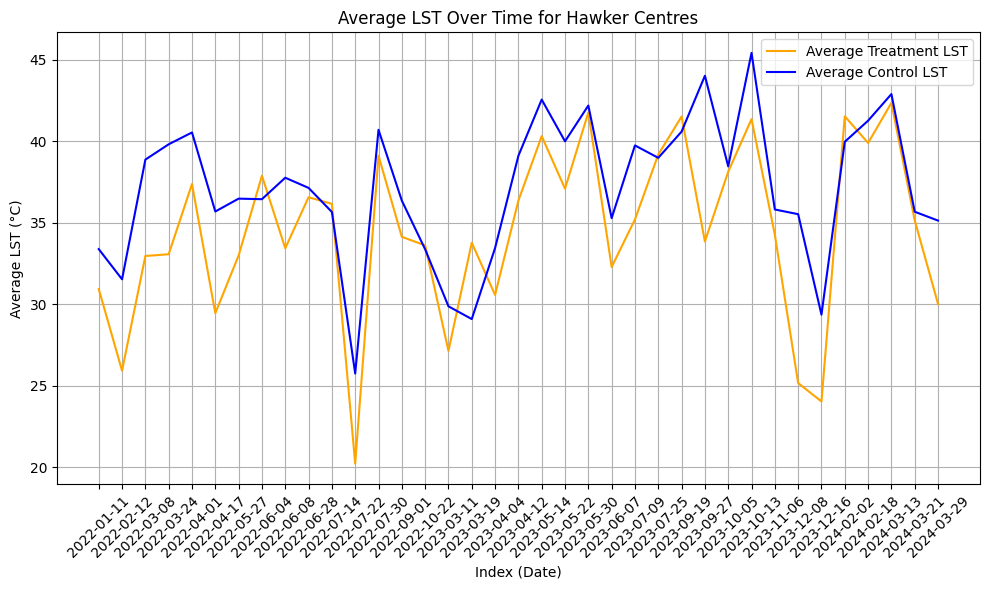

In [275]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for both Landsat 8 and Landsat 9 datasets
file_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat8\Hawker_Centres_Filtered_2022_to_2024.csv"
file_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat9\Hawker_Centres_Filtered_2022_to_2024.csv"
file_path_L7 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat7\all_data_2022.csv"

# Load the datasets
data_L8 = pd.read_csv(file_path_L8)
data_L9 = pd.read_csv(file_path_L9)
data_L7 = pd.read_csv(file_path_L7)

# Rename temperature columns to a unified column name 'LST_Celsius'
data_L8.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
data_L9.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
data_L7.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)

# Convert 'time' column to datetime for both datasets
data_L8['time'] = pd.to_datetime(data_L8['time'])
data_L9['time'] = pd.to_datetime(data_L9['time'])
data_L7['time'] = pd.to_datetime(data_L7['time'])

# Concatenate both datasets
cc_hawker_data = pd.concat([data_L8, data_L9, data_L7], ignore_index=True)

# List of hawker centres to be treated as "treatment"
treatment_centres = [
    # "North Bridge Road Market & Food Centre"
    # "Holland Village Market & Food Centre"
    "Commonwealth Crescent Market"
]

# Label data as 'treatment' or 'control' based on hawker centre
cc_hawker_data['CTRL_TREATMENT'] = cc_hawker_data['Hawker Centre'].apply(lambda x: 'treatment' if x in treatment_centres else 'control')

# Filter out unwanted QA_PIXEL values
# qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826, 5896, 7698, 7442, 7440]
qa_pixel_filter = [22280, 55052, 56660, 5896, 7698, 7442, 7440]
cc_hawker_data = cc_hawker_data[~cc_hawker_data['QA_PIXEL'].isin(qa_pixel_filter)]

# Additional filtering for 'SR_QA_AEROSOL'
# sr_qa_aerosol_filter = [192, 194, 196, 224, 228]
sr_qa_aerosol_filter = [192, 194, 196]
cc_hawker_data = cc_hawker_data[~cc_hawker_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

# Split the data into treatment and control datasets
treatment_data = cc_hawker_data[cc_hawker_data['CTRL_TREATMENT'] == 'treatment']
control_data = cc_hawker_data[cc_hawker_data['CTRL_TREATMENT'] == 'control']

# Group by 'time' and calculate the average LST for treatment and control
average_treatment_lst = treatment_data.groupby('time')['LST_Celsius'].mean().reset_index()
average_control_lst = control_data.groupby('time')['LST_Celsius'].mean().reset_index()

# Merge the average data on 'time' to ensure both have data for the same dates
merged_data = pd.merge(average_treatment_lst, average_control_lst, on='time', suffixes=('_treatment', '_control'))

# Create evenly spaced indices for the x-axis
x_ticks = range(len(merged_data))

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(x_ticks, merged_data['LST_Celsius_treatment'], label='Average Treatment LST', color='orange', linestyle='-')
plt.plot(x_ticks, merged_data['LST_Celsius_control'], label='Average Control LST', color='blue', linestyle='-')
plt.title('Average LST Over Time for Hawker Centres')
plt.xlabel('Index (Date)')
plt.ylabel('Average LST (°C)')
plt.legend()
plt.grid(True)
plt.xticks(x_ticks, merged_data['time'].dt.strftime('%Y-%m-%d'), rotation=45)  # Use custom date labels
plt.tight_layout()  # Adjust layout to make room for date labels
plt.show()

### Differences-in-Differences Regression

##### Coefficient of `treatment:treatment_date` is 1.1751 and is not statistically significant

In [276]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Convert 'time' column to datetime if it's not already
cc_hawker_data['time'] = pd.to_datetime(cc_hawker_data['time'])

# Create 'treatment' column where 'Treatment' group members receive 1, others 0
cc_hawker_data['treatment'] = (cc_hawker_data['CTRL_TREATMENT'] == 'treatment').astype(int)

# Create 'time' column for post-treatment period (October 2020 onwards), assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2024-01-01')
cc_hawker_data['treatment_date'] = (cc_hawker_data['time'].dt.date >= cutoff_date.date()).astype(int)

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment:treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=cc_hawker_data).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     197.2
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          8.66e-127
Time:                        15:34:46   Log-Likelihood:            -1.0929e+05
No. Observations:               33971   AIC:                         2.186e+05
Df Residuals:                   33967   BIC:                         2.186e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Prior Trends Test (Parallel Trends Assumption)

In [277]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = cc_hawker_data

# Define the cutoff date
cutoff_date = pd.Timestamp('2024-01-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre['time'].dt.date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0})

# Fit the regression model
model = smf.ols('LST_Celsius ~ time_periods + int_time_group + C(CTRL_TREATMENT)', data=df_pre).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     22.49
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.53e-14
Time:                        15:35:10   Log-Likelihood:                -93856.
No. Observations:               28963   AIC:                         1.877e+05
Df Residuals:                   28959   BIC:                         1.878e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### Placebo Test

##### Chosen date is 2023-01, 2023-04, 2023-07, 2023-11, all do not report statistically significant differences except 2023-11

In [278]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
cc_hawker_data['time'] = pd.to_datetime(cc_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2024-01-01')
df_pre_treatment = cc_hawker_data[cc_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-01-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     354.6
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          3.48e-226
Time:                        15:35:24   Log-Likelihood:                -93367.
No. Observations:               28963   AIC:                         1.867e+05
Df Residuals:                   28959   BIC:                         1.868e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [279]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
cc_hawker_data['time'] = pd.to_datetime(cc_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2024-01-01')
df_pre_treatment = cc_hawker_data[cc_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-04-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     696.2
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:35:33   Log-Likelihood:                -92881.
No. Observations:               28963   AIC:                         1.858e+05
Df Residuals:                   28959   BIC:                         1.858e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [280]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
cc_hawker_data['time'] = pd.to_datetime(cc_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2024-01-01')
df_pre_treatment = cc_hawker_data[cc_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-07-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     293.9
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          5.48e-188
Time:                        15:35:40   Log-Likelihood:                -93455.
No. Observations:               28963   AIC:                         1.869e+05
Df Residuals:                   28959   BIC:                         1.870e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [281]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
cc_hawker_data['time'] = pd.to_datetime(cc_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2024-01-01')
df_pre_treatment = cc_hawker_data[cc_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-11-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     157.2
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          4.37e-101
Time:                        15:35:48   Log-Likelihood:                -93655.
No. Observations:               28963   AIC:                         1.873e+05
Df Residuals:                   28959   BIC:                         1.874e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Holland Village Market & Food Centre

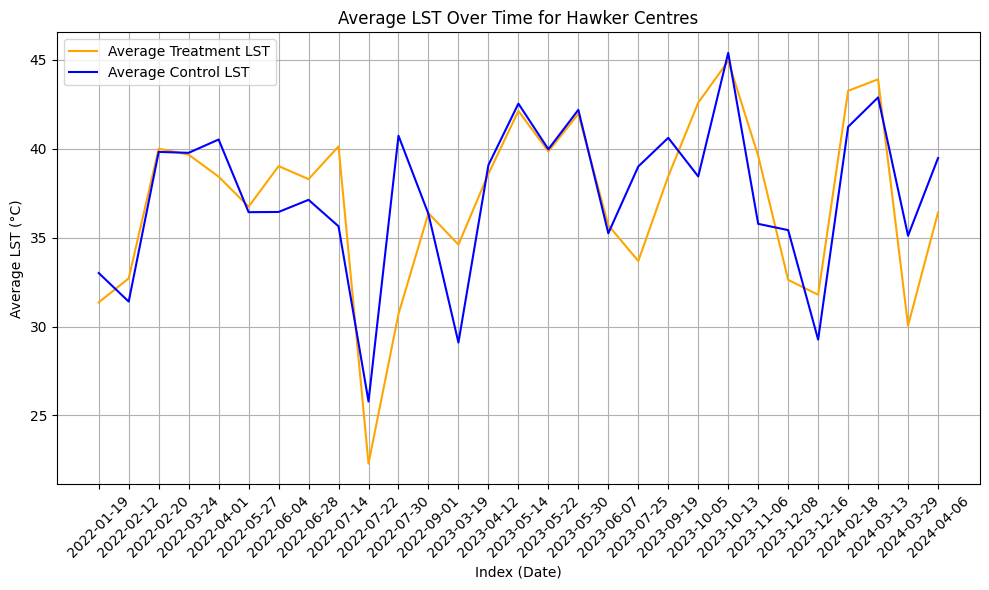

In [282]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for both Landsat 8 and Landsat 9 datasets
file_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat8\Hawker_Centres_Filtered_2022_to_2024.csv"
file_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat9\Hawker_Centres_Filtered_2022_to_2024.csv"
file_path_L7 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat7\all_data_2022.csv"

# Load the datasets
data_L8 = pd.read_csv(file_path_L8)
data_L9 = pd.read_csv(file_path_L9)
data_L7 = pd.read_csv(file_path_L7)

# Rename temperature columns to a unified column name 'LST_Celsius'
data_L8.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
data_L9.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
data_L7.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)

# Convert 'time' column to datetime for both datasets
data_L8['time'] = pd.to_datetime(data_L8['time'])
data_L9['time'] = pd.to_datetime(data_L9['time'])
data_L7['time'] = pd.to_datetime(data_L7['time'])

# Concatenate both datasets
hv_hawker_data = pd.concat([data_L8, data_L9, data_L7], ignore_index=True)

# List of hawker centres to be treated as "treatment"
treatment_centres = [
    # "North Bridge Road Market & Food Centre"
    "Holland Village Market & Food Centre"
    # "Commonwealth Crescent Market"
]

# Label data as 'treatment' or 'control' based on hawker centre
hv_hawker_data['CTRL_TREATMENT'] = hv_hawker_data['Hawker Centre'].apply(lambda x: 'treatment' if x in treatment_centres else 'control')

# Filter out unwanted QA_PIXEL values
# qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826, 5896, 7698, 7442, 7440]
qa_pixel_filter = [22280, 55052, 56660, 5896, 7698, 7442, 7440]
hv_hawker_data = hv_hawker_data[~hv_hawker_data['QA_PIXEL'].isin(qa_pixel_filter)]

# Additional filtering for 'SR_QA_AEROSOL'
# sr_qa_aerosol_filter = [192, 194, 196, 224, 228]
sr_qa_aerosol_filter = [192, 194, 196]
hv_hawker_data = hv_hawker_data[~hv_hawker_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

# Split the data into treatment and control datasets
treatment_data = hv_hawker_data[hv_hawker_data['CTRL_TREATMENT'] == 'treatment']
control_data = hv_hawker_data[hv_hawker_data['CTRL_TREATMENT'] == 'control']

# Group by 'time' and calculate the average LST for treatment and control
average_treatment_lst = treatment_data.groupby('time')['LST_Celsius'].mean().reset_index()
average_control_lst = control_data.groupby('time')['LST_Celsius'].mean().reset_index()

# Merge the average data on 'time' to ensure both have data for the same dates
merged_data = pd.merge(average_treatment_lst, average_control_lst, on='time', suffixes=('_treatment', '_control'))

# Create evenly spaced indices for the x-axis
x_ticks = range(len(merged_data))

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(x_ticks, merged_data['LST_Celsius_treatment'], label='Average Treatment LST', color='orange', linestyle='-')
plt.plot(x_ticks, merged_data['LST_Celsius_control'], label='Average Control LST', color='blue', linestyle='-')
plt.title('Average LST Over Time for Hawker Centres')
plt.xlabel('Index (Date)')
plt.ylabel('Average LST (°C)')
plt.legend()
plt.grid(True)
plt.xticks(x_ticks, merged_data['time'].dt.strftime('%Y-%m-%d'), rotation=45)  # Use custom date labels
plt.tight_layout()  # Adjust layout to make room for date labels
plt.show()

### Differences-in-Differences Regression

##### Coefficient of `treatment:treatment_date` is 0.0964 and is not statistically significant

In [285]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Convert 'time' column to datetime if it's not already
hv_hawker_data['time'] = pd.to_datetime(hv_hawker_data['time'])

# Create 'treatment' column where 'Treatment' group members receive 1, others 0
hv_hawker_data['treatment'] = (hv_hawker_data['CTRL_TREATMENT'] == 'treatment').astype(int)

# Create 'time' column for post-treatment period (October 2020 onwards), assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2023-08-01')
hv_hawker_data['treatment_date'] = (hv_hawker_data['time'].dt.date >= cutoff_date.date()).astype(int)

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment:treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=hv_hawker_data).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     307.9
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          3.10e-197
Time:                        15:56:27   Log-Likelihood:            -1.0913e+05
No. Observations:               33971   AIC:                         2.183e+05
Df Residuals:                   33967   BIC:                         2.183e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Prior Trends Test (Parallel Trends Assumption)

In [286]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = hv_hawker_data

# Define the cutoff date
cutoff_date = pd.Timestamp('2023-08-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre['time'].dt.date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0})

# Fit the regression model
model = smf.ols('LST_Celsius ~ time_periods + int_time_group + C(CTRL_TREATMENT)', data=df_pre).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     91.05
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.51e-58
Time:                        15:57:08   Log-Likelihood:                -68533.
No. Observations:               21387   AIC:                         1.371e+05
Df Residuals:                   21383   BIC:                         1.371e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### Placebo Test

##### Chosen date is 2022-08, 2022-11, 2023-02, 2023-05, all do not report statistically significant differences

In [288]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
hv_hawker_data['time'] = pd.to_datetime(hv_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2023-08-01')
df_pre_treatment = hv_hawker_data[hv_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2022-08-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     30.57
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.03e-19
Time:                        15:58:02   Log-Likelihood:                -68623.
No. Observations:               21387   AIC:                         1.373e+05
Df Residuals:                   21383   BIC:                         1.373e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [290]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
hv_hawker_data['time'] = pd.to_datetime(hv_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2023-08-01')
df_pre_treatment = hv_hawker_data[hv_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2022-11-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     138.1
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.32e-88
Time:                        15:58:16   Log-Likelihood:                -68464.
No. Observations:               21387   AIC:                         1.369e+05
Df Residuals:                   21383   BIC:                         1.370e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [291]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
hv_hawker_data['time'] = pd.to_datetime(hv_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2023-08-01')
df_pre_treatment = hv_hawker_data[hv_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-02-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     246.4
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          3.31e-157
Time:                        15:58:29   Log-Likelihood:                -68306.
No. Observations:               21387   AIC:                         1.366e+05
Df Residuals:                   21383   BIC:                         1.367e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [292]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
hv_hawker_data['time'] = pd.to_datetime(hv_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2023-08-01')
df_pre_treatment = hv_hawker_data[hv_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-05-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     689.0
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:58:37   Log-Likelihood:                -67682.
No. Observations:               21387   AIC:                         1.354e+05
Df Residuals:                   21383   BIC:                         1.354e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### North Bridge Road Market & Food Centre

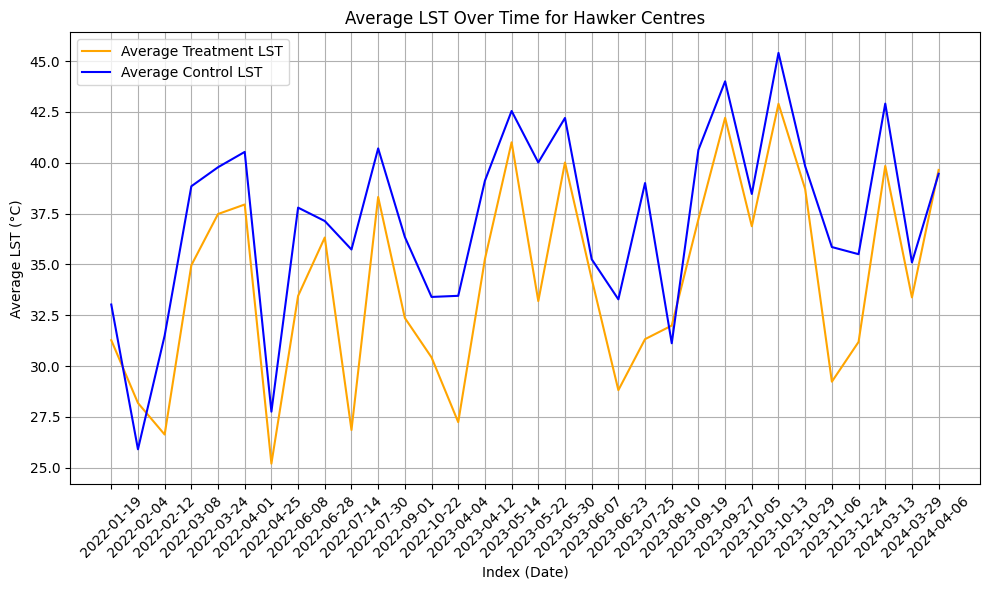

In [293]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for both Landsat 8 and Landsat 9 datasets
file_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat8\Hawker_Centres_Filtered_2022_to_2024.csv"
file_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat9\Hawker_Centres_Filtered_2022_to_2024.csv"
file_path_L7 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat7\all_data_2022.csv"

# Load the datasets
data_L8 = pd.read_csv(file_path_L8)
data_L9 = pd.read_csv(file_path_L9)
data_L7 = pd.read_csv(file_path_L7)

# Rename temperature columns to a unified column name 'LST_Celsius'
data_L8.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
data_L9.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
data_L7.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)

# Convert 'time' column to datetime for both datasets
data_L8['time'] = pd.to_datetime(data_L8['time'])
data_L9['time'] = pd.to_datetime(data_L9['time'])
data_L7['time'] = pd.to_datetime(data_L7['time'])

# Concatenate both datasets
nbr_hawker_data = pd.concat([data_L8, data_L9, data_L7], ignore_index=True)

# List of hawker centres to be treated as "treatment"
treatment_centres = [
    "North Bridge Road Market & Food Centre"
    # "Holland Village Market & Food Centre"
    # "Commonwealth Crescent Market"
]

# Label data as 'treatment' or 'control' based on hawker centre
nbr_hawker_data['CTRL_TREATMENT'] = nbr_hawker_data['Hawker Centre'].apply(lambda x: 'treatment' if x in treatment_centres else 'control')

# Filter out unwanted QA_PIXEL values
# qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826, 5896, 7698, 7442, 7440]
qa_pixel_filter = [22280, 55052, 56660, 5896, 7698, 7442, 7440]
nbr_hawker_data = nbr_hawker_data[~nbr_hawker_data['QA_PIXEL'].isin(qa_pixel_filter)]

# Additional filtering for 'SR_QA_AEROSOL'
# sr_qa_aerosol_filter = [192, 194, 196, 224, 228]
sr_qa_aerosol_filter = [192, 194, 196]
nbr_hawker_data = nbr_hawker_data[~nbr_hawker_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

# Split the data into treatment and control datasets
treatment_data = nbr_hawker_data[nbr_hawker_data['CTRL_TREATMENT'] == 'treatment']
control_data = nbr_hawker_data[nbr_hawker_data['CTRL_TREATMENT'] == 'control']

# Group by 'time' and calculate the average LST for treatment and control
average_treatment_lst = treatment_data.groupby('time')['LST_Celsius'].mean().reset_index()
average_control_lst = control_data.groupby('time')['LST_Celsius'].mean().reset_index()

# Merge the average data on 'time' to ensure both have data for the same dates
merged_data = pd.merge(average_treatment_lst, average_control_lst, on='time', suffixes=('_treatment', '_control'))

# Create evenly spaced indices for the x-axis
x_ticks = range(len(merged_data))

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(x_ticks, merged_data['LST_Celsius_treatment'], label='Average Treatment LST', color='orange', linestyle='-')
plt.plot(x_ticks, merged_data['LST_Celsius_control'], label='Average Control LST', color='blue', linestyle='-')
plt.title('Average LST Over Time for Hawker Centres')
plt.xlabel('Index (Date)')
plt.ylabel('Average LST (°C)')
plt.legend()
plt.grid(True)
plt.xticks(x_ticks, merged_data['time'].dt.strftime('%Y-%m-%d'), rotation=45)  # Use custom date labels
plt.tight_layout()  # Adjust layout to make room for date labels
plt.show()

### Differences-in-Differences Regression

##### Coefficient of `treatment:treatment_date` is 1.2302 and is not statistically significant

In [296]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Convert 'time' column to datetime if it's not already
nbr_hawker_data['time'] = pd.to_datetime(nbr_hawker_data['time'])

# Create 'treatment' column where 'Treatment' group members receive 1, others 0
nbr_hawker_data['treatment'] = (nbr_hawker_data['CTRL_TREATMENT'] == 'treatment').astype(int)

# Create 'time' column for post-treatment period (October 2020 onwards), assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2024-01-01')
nbr_hawker_data['treatment_date'] = (nbr_hawker_data['time'].dt.date >= cutoff_date.date()).astype(int)

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment:treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=nbr_hawker_data).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     198.4
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          1.40e-127
Time:                        16:04:58   Log-Likelihood:            -1.0929e+05
No. Observations:               33971   AIC:                         2.186e+05
Df Residuals:                   33967   BIC:                         2.186e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Prior Trends Test (Parallel Trends Assumption)

In [299]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = nbr_hawker_data

# Define the cutoff date
cutoff_date = pd.Timestamp('2023-08-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre['time'].dt.date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0})

# Fit the regression model
model = smf.ols('LST_Celsius ~ time_periods + int_time_group + C(CTRL_TREATMENT)', data=df_pre).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     99.31
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           7.77e-64
Time:                        16:13:57   Log-Likelihood:                -68521.
No. Observations:               21387   AIC:                         1.371e+05
Df Residuals:                   21383   BIC:                         1.371e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### Placebo Test

##### Chosen date is 2023-01, 2023-04, 2023-07, 2023-11, all do not report statistically significant differences

In [300]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
nbr_hawker_data['time'] = pd.to_datetime(nbr_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2024-01-01')
df_pre_treatment = nbr_hawker_data[nbr_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-01-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     355.9
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          5.18e-227
Time:                        16:15:07   Log-Likelihood:                -93365.
No. Observations:               28963   AIC:                         1.867e+05
Df Residuals:                   28959   BIC:                         1.868e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [304]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
nbr_hawker_data['time'] = pd.to_datetime(nbr_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2024-01-01')
df_pre_treatment = nbr_hawker_data[nbr_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-04-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     699.3
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:15:31   Log-Likelihood:                -92877.
No. Observations:               28963   AIC:                         1.858e+05
Df Residuals:                   28959   BIC:                         1.858e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [305]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
nbr_hawker_data['time'] = pd.to_datetime(nbr_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2024-01-01')
df_pre_treatment = nbr_hawker_data[nbr_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-07-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     294.6
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          2.01e-188
Time:                        16:15:39   Log-Likelihood:                -93454.
No. Observations:               28963   AIC:                         1.869e+05
Df Residuals:                   28959   BIC:                         1.869e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [306]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
nbr_hawker_data['time'] = pd.to_datetime(nbr_hawker_data['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2024-01-01')
df_pre_treatment = nbr_hawker_data[nbr_hawker_data['time'] < pre_treatment_cutoff].copy()

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2023-11-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['CTRL_TREATMENT'].map({'treatment': 1, 'control': 0}) * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     155.7
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          4.35e-100
Time:                        16:15:46   Log-Likelihood:                -93658.
No. Observations:               28963   AIC:                         1.873e+05
Df Residuals:                   28959   BIC:                         1.874e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

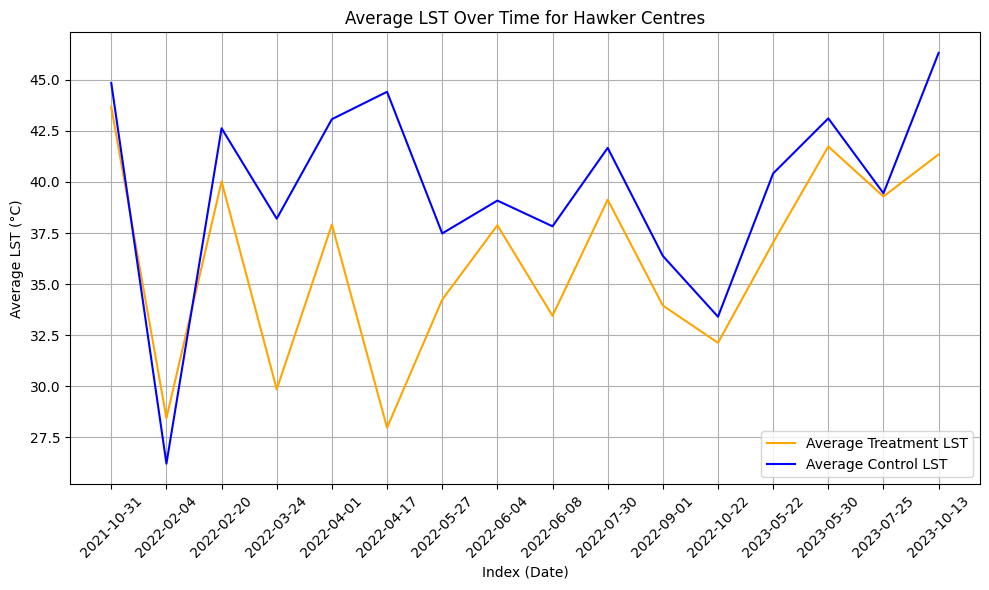

In [147]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # File paths for both Landsat 8 and Landsat 9 datasets
# file_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat8\Hawker_Centres_Filtered_2022_to_2024.csv"
# file_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat9\Hawker_Centres_Filtered_2022_to_2024.csv"
# file_path_L7 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat7\all_data_2022.csv"

# # Load the datasets
# data_L8 = pd.read_csv(file_path_L8)
# data_L9 = pd.read_csv(file_path_L9)
# data_L7 = pd.read_csv(file_path_L7)

# # Rename temperature columns to a unified column name 'LST_Celsius'
# data_L8.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
# data_L9.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
# data_L7.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)

# # Convert 'time' column to datetime for both datasets
# data_L8['time'] = pd.to_datetime(data_L8['time'])
# data_L9['time'] = pd.to_datetime(data_L9['time'])
# data_L7['time'] = pd.to_datetime(data_L7['time'])

# # Concatenate both datasets
# hawker_data = pd.concat([data_L8, data_L9, data_L7], ignore_index=True)

# # List of hawker centres to be treated as "treatment"
# treatment_centres = [
#     "North Bridge Road Market & Food Centre",
#     "Holland Village Market & Food Centre",
#     "Commonwealth Crescent Market"
# ]

# # Label data as 'treatment' or 'control' based on hawker centre
# hawker_data['CTRL_TREATMENT'] = hawker_data['Hawker Centre'].apply(lambda x: 'treatment' if x in treatment_centres else 'control')

# # Filter out unwanted QA_PIXEL values
# qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826, 5896, 7698, 7442, 7440]
# hawker_data = hawker_data[~hawker_data['QA_PIXEL'].isin(qa_pixel_filter)]

# # Additional filtering for 'SR_QA_AEROSOL'
# sr_qa_aerosol_filter = [192, 194, 196, 224, 228]
# hawker_data = hawker_data[~hawker_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

# # Split the data into treatment and control datasets
# treatment_data = hawker_data[hawker_data['CTRL_TREATMENT'] == 'treatment']
# control_data = hawker_data[hawker_data['CTRL_TREATMENT'] == 'control']

# # Group by 'time' and calculate the average LST for treatment and control
# average_treatment_lst = treatment_data.groupby('time')['LST_Celsius'].mean().reset_index()
# average_control_lst = control_data.groupby('time')['LST_Celsius'].mean().reset_index()

# # Merge the average data on 'time' to ensure both have data for the same dates
# merged_data = pd.merge(average_treatment_lst, average_control_lst, on='time', suffixes=('_treatment', '_control'))

# # Create evenly spaced indices for the x-axis
# x_ticks = range(len(merged_data))

# # Create a plot
# plt.figure(figsize=(10, 6))
# plt.plot(x_ticks, merged_data['LST_Celsius_treatment'], label='Average Treatment LST', color='orange', linestyle='-')
# plt.plot(x_ticks, merged_data['LST_Celsius_control'], label='Average Control LST', color='blue', linestyle='-')
# plt.title('Average LST Over Time for Hawker Centres')
# plt.xlabel('Index (Date)')
# plt.ylabel('Average LST (°C)')
# plt.legend()
# plt.grid(True)
# plt.xticks(x_ticks, merged_data['time'].dt.strftime('%Y-%m-%d'), rotation=45)  # Use custom date labels
# plt.tight_layout()  # Adjust layout to make room for date labels
# plt.show()

## Tuas South Street 5

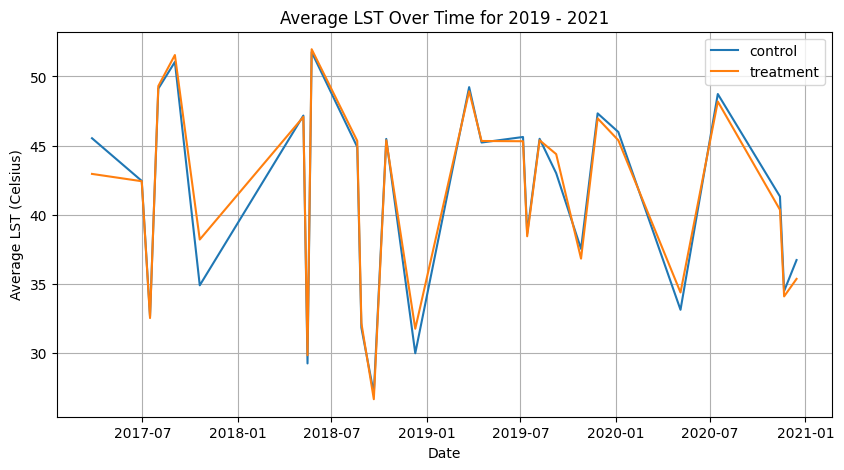

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the CSV files
file_path1 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tuas\Landsat8\Tuas_Filtered_2017_to_2020.csv"
file_path2 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tuas\Landsat7\Tuas_Filtered_2017_to_2020.csv"

# Read the CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Rename temperature columns to a unified column name
df1.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
df2.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)

# Concatenate the three dataframes
tuas_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'time' to datetime
tuas_df['time'] = pd.to_datetime(tuas_df['time'])

# Filter out unwanted QA_PIXEL values
qa_pixel_filter = [54596, 21952, 22280, 55052, 23888, 24144, 24082, 56660, 23826, 5896, 7698, 7442, 7440]
tuas_df = tuas_df[~tuas_df['QA_PIXEL'].isin(qa_pixel_filter)]

# Additional filtering for 'SR_QA_AEROSOL'
sr_qa_aerosol_filter = [192, 194, 196, 224, 228]
tuas_df = tuas_df[~tuas_df['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

# Map blocks to grouped blocks based on provided polygon numbers
treatment_polygons = ['8', '10', '12', '14']
control_polygons = ['6', '16', '18', '58', '60', '62', '64', '66', '68', '70', '72', '74', '18']

# Create a mapping function based on polygon suffix
def map_group(polygon):
    suffix = polygon.split('_')[-1]
    return 'treatment' if suffix in treatment_polygons else 'control'

tuas_df['group'] = tuas_df['BLOCK_NO'].map(map_group)

# Group by 'group' and 'time', and calculate the average LST_Celsius
grouped_data = tuas_df.groupby(['group', tuas_df['time'].dt.date])['LST_Celsius'].mean().unstack(0)
grouped_data = grouped_data.dropna(how='any', axis=0)

# Plotting
plt.figure(figsize=(10, 5))
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)
plt.title('Average LST Over Time for 2019 - 2021')
plt.xlabel('Date')
plt.ylabel('Average LST (Celsius)')
plt.grid(True)
plt.legend()
plt.show()

### Differences-in-Differences Regression

##### Coefficient of `treatment:treatment_date` is -0.9196 and is not statistically significant

In [308]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Convert 'time' column to datetime if it's not already
tuas_df['time'] = pd.to_datetime(tuas_df['time'])

# Create 'treatment' column where 'Treatment' group members receive 1, others 0
tuas_df['treatment'] = (tuas_df['group'] == 'treatment').astype(int)

# Create 'time' column for post-treatment period (October 2020 onwards), assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2020-01-01')
tuas_df['treatment_date'] = (tuas_df['time'].dt.date >= cutoff_date.date()).astype(int)

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment:treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=tuas_df).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.931
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           0.000124
Time:                        16:23:45   Log-Likelihood:                -5116.9
No. Observations:                1529   AIC:                         1.024e+04
Df Residuals:                    1525   BIC:                         1.026e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Prior Trends Test (Parallel Trends Assumption)

In [309]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = tuas_df

# Define the cutoff date
cutoff_date = pd.Timestamp('2020-01-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre['time'].dt.date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['group'].map({'treatment': 1, 'control': 0})

# Fit the regression model
model = smf.ols('LST_Celsius ~ time_periods + int_time_group + C(group)', data=df_pre).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.124
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00159
Time:                        16:25:12   Log-Likelihood:                -4327.7
No. Observations:                1282   AIC:                             8663.
Df Residuals:                    1278   BIC:                             8684.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                44.38

#### Placebo Test

##### Chosen dates are 2019-01, 2019-04, 2019-07 and 2019-10

In [310]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
tuas_df['time'] = pd.to_datetime(tuas_df['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2020-01-01')
df_pre_treatment = tuas_df[tuas_df['time'] < pre_treatment_cutoff].copy()

# Create a 'treatment' column where 'Treatment' group members receive 1, others 0
df_pre_treatment['treatment'] = (df_pre_treatment['group'].isin(['treatment'])).astype(int)

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2019-01-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     33.92
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           4.27e-21
Time:                        16:25:16   Log-Likelihood:                -4286.2
No. Observations:                1282   AIC:                             8580.
Df Residuals:                    1278   BIC:                             8601.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [311]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
tuas_df['time'] = pd.to_datetime(tuas_df['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2020-01-01')
df_pre_treatment = tuas_df[tuas_df['time'] < pre_treatment_cutoff].copy()

# Create a 'treatment' column where 'Treatment' group members receive 1, others 0
df_pre_treatment['treatment'] = (df_pre_treatment['group'].isin(['treatment'])).astype(int)

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2019-04-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     32.59
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.70e-20
Time:                        16:25:20   Log-Likelihood:                -4288.1
No. Observations:                1282   AIC:                             8584.
Df Residuals:                    1278   BIC:                             8605.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [312]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
tuas_df['time'] = pd.to_datetime(tuas_df['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2020-01-01')
df_pre_treatment = tuas_df[tuas_df['time'] < pre_treatment_cutoff].copy()

# Create a 'treatment' column where 'Treatment' group members receive 1, others 0
df_pre_treatment['treatment'] = (df_pre_treatment['group'].isin(['treatment'])).astype(int)

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2019-07-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     22.10
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.91e-14
Time:                        16:25:23   Log-Likelihood:                -4302.9
No. Observations:                1282   AIC:                             8614.
Df Residuals:                    1278   BIC:                             8634.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [313]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'bukit_purmei_2022_df' is already loaded
# Ensure the 'time' column is in datetime format
tuas_df['time'] = pd.to_datetime(tuas_df['time'])

# Filter data before October 2020 to simulate the pre-treatment period
pre_treatment_cutoff = pd.Timestamp('2020-01-01')
df_pre_treatment = tuas_df[tuas_df['time'] < pre_treatment_cutoff].copy()

# Create a 'treatment' column where 'Treatment' group members receive 1, others 0
df_pre_treatment['treatment'] = (df_pre_treatment['group'].isin(['treatment'])).astype(int)

# Create a 'time' column for the fake treatment period, setting the fake treatment date to September 1, 2020
fake_treatment_date = pd.Timestamp('2019-10-01')
df_pre_treatment['treatment_date'] = (df_pre_treatment['time'].dt.date >= fake_treatment_date.date()).astype(int)

# Interaction term combining treatment and treatment_date
df_pre_treatment['treatment_treatment_date'] = df_pre_treatment['treatment'] * df_pre_treatment['treatment_date']

# Define the formula for the regression model including the interaction term directly
formula = 'LST_Celsius ~ treatment + treatment_date + treatment_treatment_date'

# Fit the DiD regression model using ordinary least squares (OLS)
model = smf.ols(formula, data=df_pre_treatment).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LST_Celsius   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.680
Date:                Fri, 14 Jun 2024   Prob (F-statistic):             0.0117
Time:                        16:25:25   Log-Likelihood:                -4329.8
No. Observations:                1282   AIC:                             8668.
Df Residuals:                    1278   BIC:                             8688.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               